# TIPS PREDICTION

## EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


In [5]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## DATA VISUALIZATION

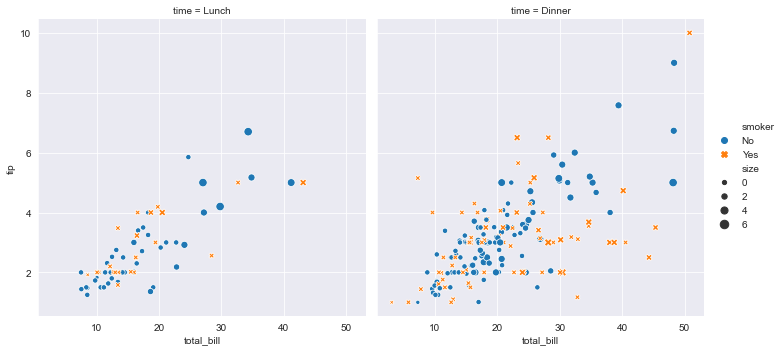

In [7]:
sns.set_style('darkgrid')
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size",data=df)

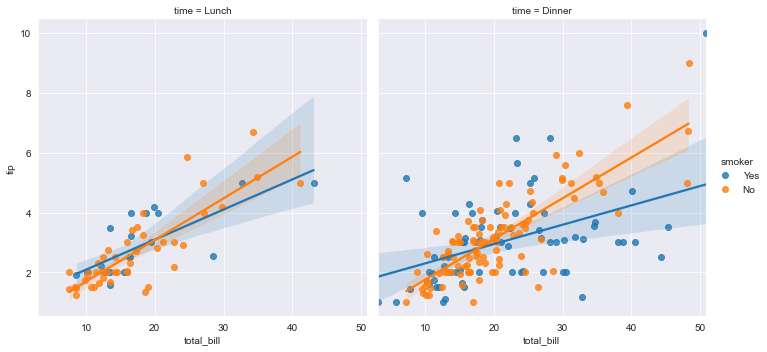

In [8]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",data=df)

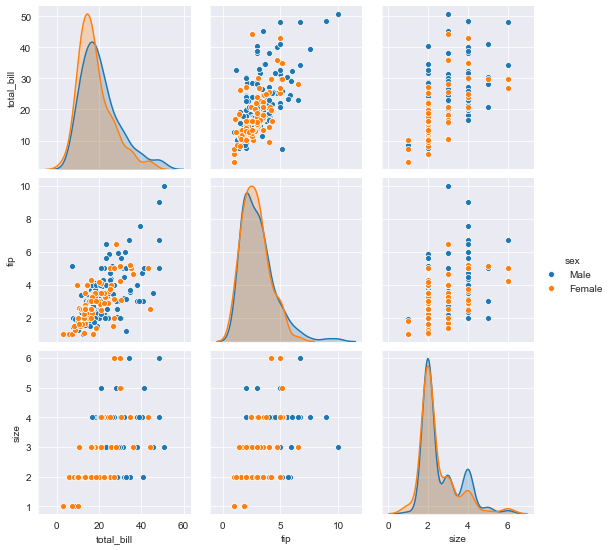

In [9]:
sns.pairplot(data=df,hue='sex')

c:\users\hrishikesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


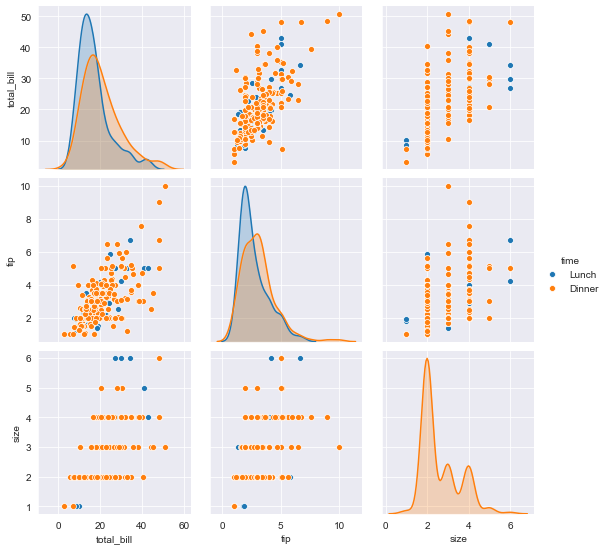

In [10]:
sns.pairplot(data=df,hue='time')

c:\users\hrishikesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\hrishikesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


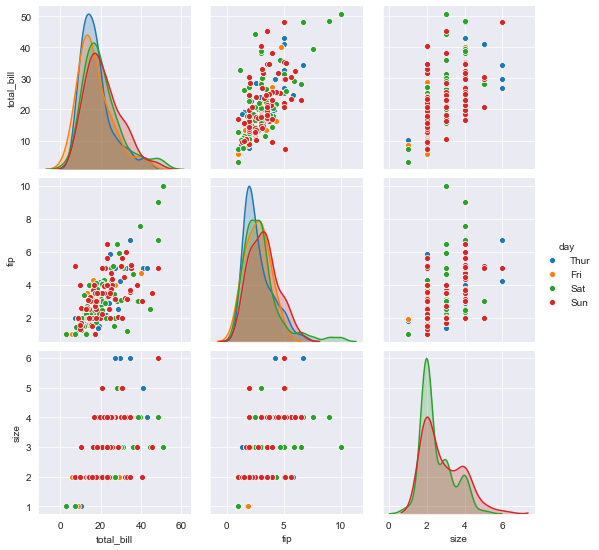

In [11]:
sns.pairplot(data=df,hue='day')

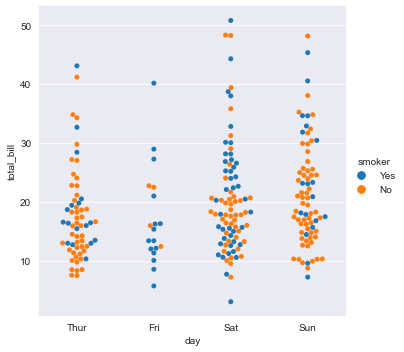

In [12]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=df)

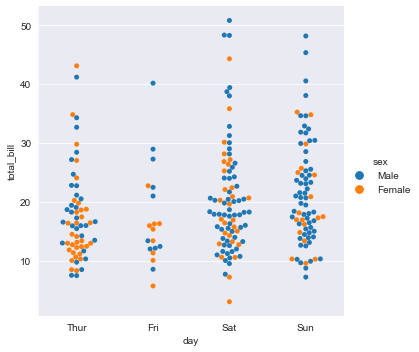

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="swarm", data=df)

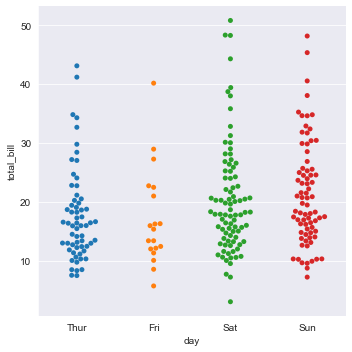

In [14]:
sns.catplot(x="day", y="total_bill", hue="day",kind="swarm", data=df)

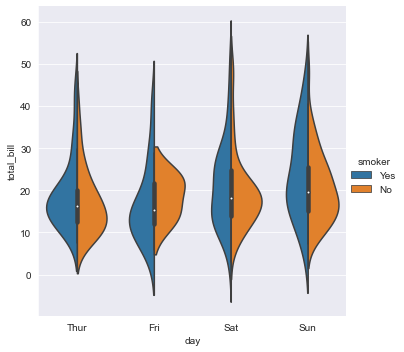

In [15]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", split=True, data=df)

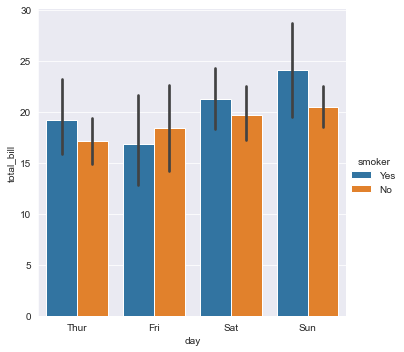

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="bar", data=df)

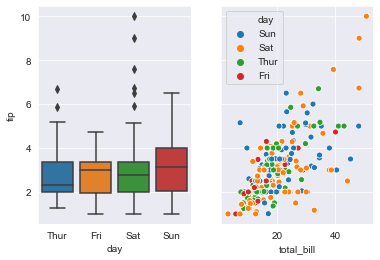

In [17]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=df, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=df, ax=axes[1]);

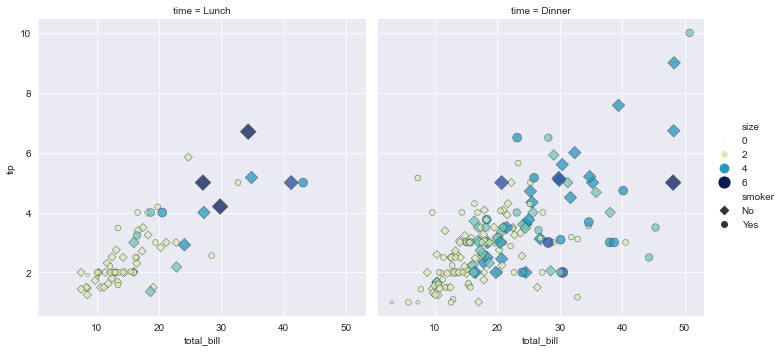

In [18]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=df)

## PREDICTION

In [32]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.model_selection import train_test_split

In [33]:
df = pd.get_dummies(df,drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('tip', axis=1)
y=df[['tip']]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

y_train_scaled=scaler.fit_transform(y_train)
y_test_scaled=scaler.fit_transform(y_test)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)
reg.score(X_test_scaled, y_test_scaled)

0.5236205131424736

In [35]:
y_pred = reg.predict(X_test)
y_pred

array([[ 7.56979916],
       [10.08621929],
       [ 8.29105358],
       [24.53119066],
       [12.71741073],
       [16.04941134],
       [ 6.15173088],
       [10.63743757],
       [ 7.33635789],
       [12.71044493],
       [13.86636107],
       [11.52382027],
       [17.572498  ],
       [ 7.85567511],
       [ 6.53376628],
       [ 5.95914163],
       [30.74470836],
       [ 9.41829027],
       [21.59613296],
       [10.32718763],
       [14.19339634],
       [15.1870524 ],
       [19.47279458],
       [ 7.02416574],
       [12.10642824],
       [11.85056073],
       [10.08768061],
       [ 9.05814478],
       [16.85143334],
       [18.4779515 ],
       [17.23766682],
       [19.87526174],
       [ 6.07194443],
       [18.49749354],
       [ 9.65080653],
       [20.987672  ],
       [11.07596741],
       [ 8.30105639],
       [ 8.92654005],
       [ 7.7662444 ],
       [13.36142201],
       [17.39558397],
       [18.40734471],
       [ 8.54402755],
       [ 9.25567201],
       [ 9

In [37]:
reg.score(X_test_scaled,y_test_scaled)

0.5236205131424736

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt=DecisionTreeRegressor(max_depth=5)

In [39]:
dt.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(max_depth=5)

In [40]:
dt.score(X_test_scaled, y_test_scaled)

0.6167239135935207

In [31]:
df

total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2           1          1        0        0        1   
1         10.34  1.66     3           0          1        0        0        1   
2         21.01  3.50     3           0          1        0        0        1   
3         23.68  3.31     2           0          1        0        0        1   
4         24.59  3.61     4           1          1        0        0        1   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3           0          1        0        1        0   
240       27.18  2.00     2           1          0        0        1        0   
241       22.67  2.00     2           0          0        0        1        0   
242       17.82  1.75     2           0          1        0        1        0   
243       18.78  3.00     2           1          1        0        0        0   

     time_Dinner  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
239            1  
240            1  
241            1  
242            1  
243            1  

[244 rows x 9 columns]

In [51]:
from sklearn.ensemble import RandomForestRegressor

dt=RandomForestRegressor(max_depth=5)
dt.fit(X_train_scaled, y_train_scaled)
dt.score(X_test_scaled, y_test_scaled)

<ipython-input-51-d74a179fb5e2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt.fit(X_train_scaled, y_train_scaled)


0.5671242350417105